# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 45

Group Members:
- Ahmad Farid Mudrika (13522008)
- Muhammad Yusuf Rafi (13522009)
- ...

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
df.head()

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,id
0,FIN,0.121478,258,172,252,254,0,0,-,14158.942380,8495.365234,6,4,1
1,FIN,0.649902,734,42014,62,252,2,17,-,8395.112305,503571.312500,14,38,2
2,FIN,1.623129,364,13186,62,252,1,6,-,1572.271851,60929.230470,8,16,3
3,FIN,1.681642,628,770,62,252,1,3,ftp,2740.178955,3358.622070,12,12,4
4,FIN,0.449454,534,268,254,252,2,1,-,8561.499023,3987.059814,10,6,5


In [3]:
!pip install google.colab

ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import glob
import os
import pandas as pd

folder_path = './train'

train_csv_files = [f for f in glob.glob(os.path.join(folder_path, '*.csv'))
                   if 'UNSW-NB15_features-modified.csv' not in f]

df_list = [pd.read_csv(file) for file in train_csv_files]

#merge
train_merged_df = df_list[0]
for df in df_list[1:]:
    train_merged_df = pd.merge(train_merged_df, df, on='id', how='outer')

train_merged_df.drop('label', axis=1, inplace=True)
print(train_merged_df.head())

   is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  \
0              0.0           0.0               0.0           0.0         0.0   
1              0.0           2.0               0.0           0.0         0.0   
2              0.0           NaN               0.0           0.0         0.0   
3              0.0           0.0               0.0           0.0         0.0   
4              0.0           0.0               0.0           0.0         0.0   

   ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ...  \
0        11.0         NaN         5.0         4.0               2.0  ...   
1        10.0        10.0        10.0        10.0               NaN  ...   
2         4.0         4.0         2.0         2.0               1.0  ...   
3         9.0         9.0         3.0         2.0               2.0  ...   
4         3.0         3.0         4.0         3.0               1.0  ...   

   response_body_len  proto  attack_cat         sjit         d

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [5]:
# Write your code here
train_merged_df.isnull().sum()


is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
id                      0
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
sjit                 8738
djit                 8846
sinpkt      

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [6]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...
from sklearn.model_selection import train_test_split
#drop id karena gaguna, drop label karena gada di test set.
train_df, val_df = train_test_split(train_merged_df, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")


Training set size: 140272
Validation set size: 35069


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class MissingDataImputerNum(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_strategy='mean'):
        self.numerical_strategy = numerical_strategy
        self.num_imputer = SimpleImputer(strategy=self.numerical_strategy)

    def fit(self, X, y=None):
        self.numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
        self.num_imputer.fit(X[self.numerical_columns])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.numerical_columns] = self.num_imputer.transform(X[self.numerical_columns])
        return X

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [8]:
class MissingDataImputerCat(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_strategy='most_frequent'):
        self.categorical_strategy = categorical_strategy
        self.cat_imputer = SimpleImputer(strategy=self.categorical_strategy)

    def fit(self, X, y=None):
        self.categorical_columns = X.select_dtypes(include=['object']).columns
        self.cat_imputer.fit(X[self.categorical_columns])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.categorical_columns] = self.cat_imputer.transform(X[self.categorical_columns])
        return X

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [9]:
# Handle outliers by capping values beyond 1.5 * IQR to upper and lower limits
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, method="iqr", multiplier=1.5):
        self.method = method
        self.multiplier = multiplier
        self.lower_limit_ = None
        self.upper_limit_ = None

    def fit(self, X, y=None):
        if self.method == "iqr":
            Q1 = X.quantile(0.25)
            Q3 = X.quantile(0.75)
            IQR = Q3 - Q1
            self.lower_limit_ = Q1 - self.multiplier * IQR
            self.upper_limit_ = Q3 + self.multiplier * IQR
        return self

    def transform(self, X):
        if self.lower_limit_ is None or self.upper_limit_ is None:
            raise RuntimeError("The OutlierHandler instance is not fitted yet. Call 'fit' first.")
        
        X = X.copy()
        X_capped = X.clip(lower=self.lower_limit_, upper=self.upper_limit_, axis=1)
        return X_capped

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [10]:
train_df.drop_duplicates(inplace=True)
print(f"Training set size after removing duplicates: {len(train_df)}")

val_df.drop_duplicates(inplace=True)
print(f"Validation set size after removing duplicates: {len(val_df)}")

Training set size after removing duplicates: 140272
Validation set size after removing duplicates: 35069


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [11]:
# Write your code here
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if 'sjit' in X.columns and 'djit' in X.columns:
            X['jit'] = X['sjit'] + X['djit']
            X.drop(columns=['sjit', 'djit', 'synack', 'ackdat'], inplace=True)
        if 'label' in X.columns:
            X.drop(columns=['label'], inplace=True)
        return X
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [12]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np
import pandas as pd

class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='standardization'):
        self.strategy = strategy
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        if self.strategy == 'standardization':
            self.scaler = StandardScaler()
            self.scaler.fit(X)
        return self

    def transform(self, X, y=None):
        X_scaled = self.scaler.transform(X)
        
        return X_scaled

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class FeatureEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, encoding_method='one_hot', target_column=None):
        self.encoding_method = encoding_method
        self.target_column = target_column
        self.encoders = {}

    def fit(self, X, y=None):
        if self.encoding_method == 'one_hot':
            self.encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
            self.encoder.fit(X.select_dtypes(include=['object', 'category']))

        return self

    def transform(self, X):
        X_transformed = X.copy()
        if self.encoding_method == 'one_hot':
            one_hot_encoded = self.encoder.transform(X_transformed.select_dtypes(include=['object', 'category']))
            one_hot_cols = self.encoder.get_feature_names_out(X_transformed.select_dtypes(include=['object', 'category']).columns)
            one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_cols, index=X_transformed.index)
            X_transformed = pd.concat([X_transformed.drop(columns=self.encoder.feature_names_in_), one_hot_df], axis=1)

        return X_transformed

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [15]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 41.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import numpy as np

class HandleImbalancedDataset(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='smote', class_weight=None):
        """
        Initialize the imbalanced dataset handler.

        Parameters:
        - strategy (str): The resampling strategy. Options are 'smote', 'oversample', or 'undersample'.
        - class_weight (str or dict, optional): Class weights for algorithms that support it. Options are 'balanced' or a dictionary of class weights.
        """
        self.strategy = strategy
        self.class_weight = class_weight

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        if self.class_weight == 'balanced':
            self.class_weight_ = compute_class_weight(class_weight='balanced', classes=self.classes_, y=y)
        else:
            self.class_weight_ = self.class_weight
        return self

    def transform(self, X, y):
        if self.strategy == 'smote':
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X, y)
        elif self.strategy == 'oversample':
            minority_class = y.value_counts().idxmin()
            minority_samples = X[y == minority_class]
            additional_samples = minority_samples.sample(n=y.value_counts().max() - y.value_counts().min(), replace=True, random_state=42)
            X_resampled = pd.concat([X, additional_samples])
            y_resampled = pd.concat([y, pd.Series([minority_class] * len(additional_samples), index=additional_samples.index)])
        elif self.strategy == 'undersample':
            majority_class = y.value_counts().idxmax()
            majority_samples = X[y == majority_class]
            reduced_samples = majority_samples.sample(n=y.value_counts().min(), random_state=42)
            X_resampled = pd.concat([X[y != majority_class], reduced_samples])
            y_resampled = pd.concat([y[y != majority_class], pd.Series([majority_class] * len(reduced_samples), index=reduced_samples.index)])
        else:
            raise ValueError(f"Unsupported strategy: {self.strategy}")

        return X_resampled, y_resampled

    def fit_transform(self, X, y):
        return self.fit(X, y).transform(X, y)

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [17]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class CustomNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X, y=None):
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        return self

    def transform(self, X):
        X_normalized = (X - self.mean_) / self.std_
        return pd.DataFrame(X_normalized, columns=X.columns)

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

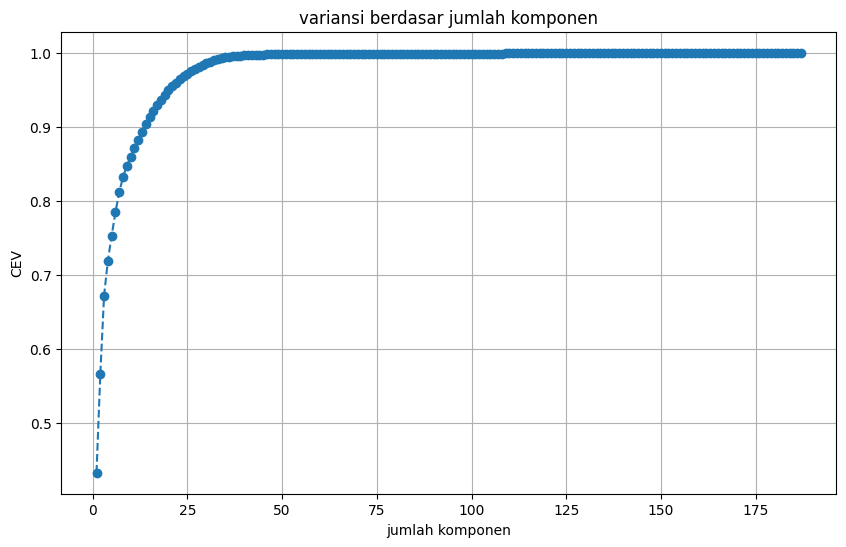

In [37]:
# Write your code here
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#lakukan preprocessing tanpa pca, lalu jalankan cell ini.
#Ini digunakan untuk mencari variabel yang paling signifikan
# # Perform PCA
# pca = PCA()
# pca.fit(train_df_transformed)

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# plt.xlabel('jumlah komponen')
# plt.ylabel('CEV')
# plt.title('variansi berdasar jumlah komponen')
# plt.grid(True)
# plt.show()

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Buat pipeline untuk kolom numerik
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'attack_cat']

# Pipeline untuk kolom numerik
numeric_pipeline = Pipeline([
    ('featureengineering', FeatureEngineering()),
    # ('normalizer', CustomNormalizer()),
    ('imputer', MissingDataImputerNum(numerical_strategy='mean')),
    ('outlierhandler', OutlierHandler(method='iqr', multiplier=1.5)),
    ('scaler', FeatureScaler(strategy='standardization'))
])

# Pipeline untuk kolom kategorikal
categorical_pipeline = Pipeline([
    ('featureengineering', FeatureEngineering()),
    ('imputer', MissingDataImputerCat(categorical_strategy='most_frequent')),
    # ('imbalancedata', HandleImbalancedDataset(strategy='smote')),
    ('featureencoding', FeatureEncoding(encoding_method='one_hot'))
])

# Kolom transformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=22))
])

# train_set = pipe.fit_transform(train_set)


or create your own here

In [36]:
# Transformasi dataset menggunakan preprocessor
# pake preprocessor kalo mau nyoba plot pca
train_df_transformed = pipeline.fit_transform(train_df)
val_df_transformed = pipeline.transform(val_df)
target_col = 'attack_cat'
# Ubah target menjadi numpy array karena library scikit-learn membutuhkan format ini
X_train = train_df_transformed
y_train = train_df[target_col].to_numpy()

X_val = val_df_transformed
y_val = val_df[target_col].to_numpy()

# Menggunakan class HandleImbalancedDataset
handle_imbalance = HandleImbalancedDataset(strategy='smote', class_weight='balanced')

# Resample data (menggunakan class yang dibuat)
X_train_balanced, y_train_balanced = handle_imbalance.fit_transform(X_train, y_train)

print(X_train_balanced)
print(y_train_balanced)
print(X_val)

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[[ 0.00000000e+00 -3.37049065e-01  5.55111512e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  8.71170395e-01  5.55111512e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  8.71170395e-01  5.55111512e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  8.71170395e-01  5.55111512e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.37049065e-01  5.55111512e-17 .

In [21]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [29]:
!pip install numba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 73.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [25]:
# Type your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediksi dengan data validasi
y_pred_knn = knn.predict(X_val)
print("Akurasi KNN:", accuracy_score(y_val, y_pred_knn))
print("Classification Report KNN:\n", classification_report(y_val, y_pred_knn))

Akurasi KNN: 0.7471556075166101
Classification Report KNN:
                 precision    recall  f1-score   support

      Analysis       0.13      0.15      0.14       384
      Backdoor       0.08      0.06      0.07       367
           DoS       0.30      0.36      0.33      2459
      Exploits       0.62      0.67      0.65      6636
       Fuzzers       0.54      0.61      0.57      3637
       Generic       0.99      0.97      0.98      7975
        Normal       0.91      0.86      0.88     11254
Reconnaissance       0.65      0.55      0.60      2070
     Shellcode       0.33      0.05      0.09       259
         Worms       0.60      0.11      0.18        28

      accuracy                           0.75     35069
     macro avg       0.52      0.44      0.45     35069
  weighted avg       0.76      0.75      0.75     35069



In [115]:
import numpy as np
from numba import njit, jit
from collections import Counter

@njit(fastmath=True, cache=True)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

@njit(fastmath=True, cache=True)
def find_k_nearest_neighbors(X_train, x, k):
    distances = np.zeros(X_train.shape[0])
    for i in range(X_train.shape[0]):
        distances[i] = euclidean_distance(x, X_train[i])
    return np.argsort(distances)[:k]

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
        self.label_mapping = None
    
    def fit(self, X, y):
        self.X_train = np.asarray(X, dtype=np.float64)

        unique_labels = np.unique(y)
        self.label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

        self.y_train = np.array([self.label_mapping[label] for label in y], dtype=np.int64)
        
        return self
    
    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)

        predictions = np.zeros(X.shape[0], dtype=np.int64)

        for i in range(X.shape[0]):
            k_indices = find_k_nearest_neighbors(self.X_train, X[i], self.k)

            k_nearest_labels = self.y_train[k_indices]

            label_counts = Counter(k_nearest_labels)
            predictions[i] = max(label_counts, key=label_counts.get)
            if i%100 == 0:
                print(i)
        # decode
        reverse_mapping = {idx: label for label, idx in self.label_mapping.items()}
        return np.array([reverse_mapping[pred] for pred in predictions])

In [116]:
#15 menitan
from sklearn.metrics import accuracy_score
clifier = KNN(k=4)
print(131)
clifier.fit(X_train, y_train)
print(122)
# load
#import joblib
#clifier = joblib.load('knn.pkl')
y_pred = clifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_val, y_pred))

131
122


In [117]:
import joblib
joblib.dump(clifier, 'knn.pkl')

['knn.pkl']

## B. Naive Bayes

In [52]:
nb_load = joblib.load('nb.pkl')

# Predict on the test data
y_pred = nb_load.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.6650032792494796
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       384
      Backdoor       0.06      0.03      0.04       367
           DoS       0.26      0.68      0.38      2459
      Exploits       0.63      0.43      0.51      6636
       Fuzzers       0.41      0.40      0.41      3637
       Generic       0.98      0.94      0.96      7975
        Normal       0.91      0.78      0.84     11254
Reconnaissance       0.34      0.52      0.41      2070
     Shellcode       0.33      0.00      0.01       259
         Worms       0.31      0.18      0.23        28

      accuracy                           0.67     35069
     macro avg       0.42      0.40      0.38     35069
  weighted avg       0.72      0.67      0.68     35069



In [34]:
#buat naive bayes from scratch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class GaussianNBa:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None

    def fit(self, X, y):
        total_samples, total_features = X.shape
        self.classes = np.unique(y) #prior
        total_classes = len(self.classes) 

        # Initialize mean, variance, and priors
        self.mean = np.zeros((total_classes, total_features), dtype=np.float64)
        self.var = np.zeros((total_classes, total_features), dtype=np.float64)
        self.priors = np.zeros(total_classes, dtype=np.float64)

        for idx, _class in enumerate(self.classes):
            X_class = X[y == _class]
            self.mean[idx, :] = X_class.mean(axis=0)
            self.var[idx, :] = X_class.var(axis=0)
            self.priors[idx] = X_class.shape[0] / total_samples

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for idx, cls in enumerate(self.classes):
                prior = np.log(self.priors[idx])
                prob_conditional = np.sum(np.log(self._probdensityfunc(idx, x)))
                posterior = prior + prob_conditional
                posteriors.append(posterior)

            max_idx = self.classes[np.argmax(posteriors)]
            y_pred.append(max_idx)
        return np.array(y_pred)


    def _probdensityfunc(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-(x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

model = GaussianNBa()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.6650032792494796
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       384
      Backdoor       0.06      0.03      0.04       367
           DoS       0.26      0.68      0.38      2459
      Exploits       0.63      0.43      0.51      6636
       Fuzzers       0.41      0.40      0.41      3637
       Generic       0.98      0.94      0.96      7975
        Normal       0.91      0.78      0.84     11254
Reconnaissance       0.34      0.51      0.41      2070
     Shellcode       0.25      0.00      0.01       259
         Worms       0.31      0.18      0.23        28

      accuracy                           0.67     35069
     macro avg       0.42      0.40      0.38     35069
  weighted avg       0.72      0.67      0.68     35069



In [119]:
joblib.dump(model, 'nb.pkl')

['nb.pkl']

In [35]:
#buat naive bayes from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_val)

y_pred_proba_nb = nb_model.predict_proba(X_val)

print("Naive Bayes Probabilities:\n", y_pred_proba_nb[:22])

print("Akurasi Naive Bayes:", accuracy_score(y_val, y_pred_nb))
print("Classification Report Naive Bayes:\n", classification_report(y_val, y_pred_nb))

Naive Bayes Probabilities:
 [[7.89995915e-07 2.97396239e-07 1.09387651e-05 1.45999132e-04
  1.22282420e-06 9.99835965e-01 3.87873602e-06 9.02974171e-07
  4.09631974e-09 9.07171564e-10]
 [4.16307138e-08 9.34279102e-08 2.17358377e-06 1.49182796e-05
  5.61714110e-07 9.99977461e-01 3.80135583e-06 9.46953117e-07
  7.06535416e-10 1.25072305e-09]
 [4.28998005e-02 5.98803816e-01 3.31824495e-01 1.12695549e-02
  4.56894346e-03 2.96225731e-08 4.74838212e-03 5.69977523e-03
  1.81146935e-04 4.05641451e-06]
 [1.14080456e-02 8.76951562e-02 4.74558595e-01 3.09802037e-01
  9.31892564e-03 1.65878211e-08 2.71625254e-02 7.73500508e-02
  2.70257138e-03 2.07705450e-06]
 [4.98768964e-06 2.58435373e-04 3.22910069e-03 7.25452947e-02
  9.41065869e-03 8.17215088e-12 9.14065198e-01 5.76789433e-07
  1.40397234e-07 4.85608025e-04]
 [3.10449742e-02 6.12744156e-06 1.59967856e-03 8.56097120e-01
  1.59846610e-02 6.21166443e-19 9.34977659e-02 1.57924976e-03
  1.00410849e-04 9.00126644e-05]
 [5.51087652e-02 6.91800332e-0

## C. ID3

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
np.random.seed(42)
random_rows = np.random.randint(0,len(X_train), size=1000)
id3_model.fit(X_train[random_rows], y_train[random_rows])

# Prediksi dengan data validasi
y_pred_id3 = id3_model.predict(X_val)
# print("ID3 Probabilities:\n", y_pred_id3[:5])

print("Akurasi ID3:", accuracy_score(y_val, y_pred_id3))
print("Classification Report ID3:\n", classification_report(y_val, y_pred_id3))


Akurasi ID3: 0.6459266018420827
Classification Report ID3:
                 precision    recall  f1-score   support

      Analysis       0.05      0.05      0.05       384
      Backdoor       0.04      0.04      0.04       367
           DoS       0.26      0.29      0.27      2459
      Exploits       0.52      0.47      0.49      6636
       Fuzzers       0.40      0.41      0.41      3637
       Generic       0.92      0.93      0.93      7975
        Normal       0.82      0.80      0.81     11254
Reconnaissance       0.32      0.40      0.36      2070
     Shellcode       0.06      0.03      0.04       259
         Worms       0.00      0.00      0.00        28

      accuracy                           0.65     35069
     macro avg       0.34      0.34      0.34     35069
  weighted avg       0.65      0.65      0.65     35069



In [30]:
import numpy as np
from numba import njit
from collections import Counter

@njit
def entropy(y):
    unique_vals = np.unique(y)
    counts = np.zeros_like(unique_vals)
    
    for val in unique_vals:
        counts[np.where(unique_vals == val)[0][0]] = np.sum(y == val)
    
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

@njit
def information_gain(X_column, y, threshold):
    parent_entropy = entropy(y)

    left_indices = X_column <= threshold
    right_indices = X_column > threshold

    if left_indices.sum() == 0 or right_indices.sum() == 0:
        return 0

    n = len(y)
    n_left, n_right = left_indices.sum(), right_indices.sum()

    e_left, e_right = entropy(y[left_indices]), entropy(y[right_indices])

    child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

    return parent_entropy - child_entropy

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class ID3Classifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None
        self.label_mapping = None
        self.reverse_label_mapping = None

    def fit(self, X, y):

        unique_labels = np.unique(y)
        self.label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
        self.reverse_label_mapping = {idx: label for label, idx in self.label_mapping.items()}
        y_encoded = np.array([self.label_mapping[label] for label in y])

        self.root = self._build_tree(X, y_encoded)

    def _build_tree(self, X, y, depth=0):
        print(depth)
        n_samples, n_features = X.shape
        num_labels = len(np.unique(y))

        if num_labels == 1 or n_samples == 0 or (self.max_depth is not None and depth >= self.max_depth):
            most_common_label = Counter(y).most_common(1)[0][0]
            return Node(value=most_common_label)

        best_gain = -1
        best_feature, best_threshold = None, None

        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                gain = information_gain(X_column, y, threshold)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold
        if best_gain == -1:
            most_common_label = Counter(y).most_common(1)[0][0]
            return Node(value=most_common_label)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def predict(self, X):
        """
        Predict class labels for samples in X.
        """
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array([self.reverse_label_mapping[pred] for pred in predictions])

    def _traverse_tree(self, x, node):
        """
        Traverse the tree to make a prediction for a single sample.
        """
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [33]:
# Type your code here
clifier_id3 = ID3Classifier(max_depth=6)
print(131)
clifier_id3.fit(X_train[random_rows], y_train[random_rows])
print(122)
y_pred = clifier_id3.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

131
0
1
2
3
4
4
5
5
3
2
3
4
5
5
4
5
6
6
5
6
6
3
4
5
5
4
5
5
1
2
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6
2
3
4
5
5
6
6
4
5
6
6
5
6
6
3
4
5
6
6
5
4
5
6
6
5
122
Accuracy: 0.6517437052667598
Classification Report:
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
                precision    recall  f1-score   support

      Analysis       0.02      0.01      0.01       384
      Backdoor       0.05      0.02      0.03       367
           DoS       0.03      0.00      0.00      2459
      Exploits       0.48      0.66      0.56      6636
       Fuzzers       0.41      0.45      0.43      3637
       Generic       0.95      0.92      0.93      7975
        Normal       0.94      0.75      0.83    

In [46]:
import joblib
joblib.dump(clifier_id3, 'id3.pkl')

['id3.pkl']

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [120]:
test_path = './test'

test_csv_files = [f for f in glob.glob(os.path.join(test_path, '*.csv'))
                   if 'UNSW-NB15_features-modified.csv' not in f]

test_list = [pd.read_csv(file) for file in test_csv_files]
test_merged_df = test_list[0]
for df in test_list[1:]:
    test_merged_df = pd.merge(test_merged_df, df, on='id', how='outer')

print(test_merged_df.head())
test_df = test_merged_df
print(test_df.shape)

   is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  \
0              0.0           1.0               0.0           0.0         0.0   
1              0.0           1.0               0.0           NaN         0.0   
2              0.0           1.0               0.0           0.0         0.0   
3              0.0           2.0               0.0           0.0         0.0   
4              NaN           0.0               NaN           0.0         0.0   

   ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ...  \
0         5.0         5.0         2.0         2.0               2.0  ...   
1         6.0         6.0         1.0         1.0               1.0  ...   
2         4.0         4.0         1.0         2.0               1.0  ...   
3        10.0         4.0         2.0         4.0               2.0  ...   
4        13.0        11.0        10.0         7.0               6.0  ...   

   trans_depth  response_body_len  proto         sjit        d

In [134]:
train_merged_df_transformed = pipeline.fit_transform(train_merged_df)
test_df_transformed = pipeline.transform(test_df)
target_col = 'attack_cat'
# Ubah target menjadi numpy array karena library scikit-learn membutuhkan format ini
X_train_merged = train_merged_df_transformed
y_train_merged = train_merged_df[target_col].to_numpy()

# Menggunakan class HandleImbalancedDataset
handle_imbalance = HandleImbalancedDataset(strategy='smote', class_weight='balanced')

# Resample data (menggunakan class yang dibuat)
X_train_balanced, y_train_balanced = handle_imbalance.fit_transform(X_train_merged, y_train_merged)
X_test = test_df_transformed
print(len(X_test))

/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
20583


In [139]:
# knn_model = joblib.load('knn.pkl')
# knn_model.fit(X_train_balanced, y_train_balanced)
# y_pred = knn_model.predict(X_test)
# submission = pd.DataFrame({'id': test_df['id'], 'attack_cat': y_pred})
# submission.to_csv('submission.csv', index=False)
clifier_id3 = ID3Classifier(max_depth=6)
print(131)
clifier_id3.fit(X_train_merged, y_train_merged)
print(122)
y_pred = clifier_id3.predict(X_test)
submission = pd.DataFrame({'id': test_df['id'], 'attack_cat': y_pred})
submission.to_csv('submission.csv', index=False)

131
0


KeyboardInterrupt: 

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce1a5f7-8a5d-47c2-9e9a-2688d1a2959c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>